 ***Data Extraction***

In [ ]:
# Install required packages if not already installed
!pip install datasets transformers torch torchvision
!pip install pandas numpy pillow tqdm

import pandas as pd
import numpy as np
from datasets import load_dataset
from torch.utils.data import Dataset, DataLoader
import torch
from PIL import Image
import torchvision.transforms as transforms
from typing import Dict, Tuple
from tqdm.notebook import tqdm

class ChestXrayDataset(Dataset):
    """
    Custom Dataset class for Chest X-ray images
    """
    def __init__(self, dataframe: pd.DataFrame, transform=None):
        self.data = dataframe
        self.transform = transform if transform else transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485], std=[0.229])
        ])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Get image and labels
        image = self.data.iloc[idx]['image']
        labels = torch.tensor(self.data.iloc[idx][self.get_label_columns()]).float()

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        return image, labels

    @staticmethod
    def get_label_columns():
        return ['Atelectasis', 'Consolidation', 'Infiltration',
                'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis',
                'Effusion', 'Pneumonia', 'Pleural_Thickening',
                'Cardiomegaly', 'Nodule', 'Mass', 'Hernia']

def load_chest_xray_data(batch_size: int = 32, num_workers: int = 2) -> Dict:
    """
    Load and prepare chest X-ray dataset

    Args:
        batch_size: Batch size for DataLoader
        num_workers: Number of workers for DataLoader

    Returns:
        Dictionary containing dataset info and DataLoaders
    """
    print("Loading dataset...")
    # Load dataset from HuggingFace
    dataset = load_dataset("keremberke/chest-xray-classification")

    print("Preparing data...")
    # Convert to pandas DataFrames
    train_df = pd.DataFrame(dataset['train'])
    val_df = pd.DataFrame(dataset['validation'])
    test_df = pd.DataFrame(dataset['test'])

    # Create dataset objects
    train_dataset = ChestXrayDataset(train_df)
    val_dataset = ChestXrayDataset(val_df)
    test_dataset = ChestXrayDataset(test_df)

    # Create dataloaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers
    )

    print("Creating dataset summary...")
    # Create dataset summary
    summary = {
        'train': {
            'size': len(train_df),
            'label_dist': {col: train_df[col].mean()
                          for col in ChestXrayDataset.get_label_columns()}
        },
        'validation': {
            'size': len(val_df),
            'label_dist': {col: val_df[col].mean()
                          for col in ChestXrayDataset.get_label_columns()}
        },
        'test': {
            'size': len(test_df),
            'label_dist': {col: test_df[col].mean()
                          for col in ChestXrayDataset.get_label_columns()}
        }
    }

    return {
        'train_loader': train_loader,
        'val_loader': val_loader,
        'test_loader': test_loader,
        'summary': summary
    }

def display_dataset_info(data_info: Dict):
    """
    Display dataset summary information
    """
    print("\nDataset Summary:")
    for split in ['train', 'validation', 'test']:
        print(f"\n{split.upper()} Set:")
        print(f"Number of images: {data_info['summary'][split]['size']}")
        print("\nLabel Distribution:")
        for label, freq in data_info['summary'][split]['label_dist'].items():
            print(f"{label}: {freq:.3f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:

import pandas as pd
import numpy as np
from datasets import load_dataset
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from tqdm.notebook import tqdm


try:
    print("Attempting to load dataset...")
    dataset = load_dataset("keremberke/chest-xray-classification")
    print("\nDataset structure:")
    print(dataset)

    # Print first item to see what we're working with
    print("\nFirst item in training set:")
    print(dataset['train'][0])
except Exception as e:
    print(f"Error loading dataset: {str(e)}")

Attempting to load dataset...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

chest-xray-classification.py:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

Error loading dataset: Config name is missing.
Please pick one among the available configs: ['full', 'mini']
Example of usage:
	`load_dataset('keremberke/chest-xray-classification', 'full')`


In [ ]:
# First, load the dataset with the correct config
print("Loading dataset with full config...")
dataset = load_dataset("keremberke/chest-xray-classification", 'full')

class ChestXrayDataset(Dataset):
    def __init__(self, dataset_split, transform=None):
        self.dataset = dataset_split
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]) if transform is None else transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        image = item['image']
        label = item['labels']  # Changed from 'label' to 'labels'

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label)

# Create data loaders
batch_size = 32
train_dataset = ChestXrayDataset(dataset['train'])
val_dataset = ChestXrayDataset(dataset['validation'])
test_dataset = ChestXrayDataset(dataset['test'])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Test the data loader
print("\nTesting data loader...")
try:
    for images, labels in train_loader:
        print(f"Batch shape: {images.shape}")
        print(f"Labels shape: {labels.shape}")
        print(f"Sample labels: {labels[:5]}")  # Print first 5 labels
        break

    print("\nDataset sizes:")
    print(f"Training samples: {len(train_dataset)}")
    print(f"Validation samples: {len(val_dataset)}")
    print(f"Test samples: {len(test_dataset)}")

except Exception as e:
    print(f"Error during data loading: {str(e)}")
    # Print a sample item to debug
    print("\nSample item keys:")
    sample_item = dataset['train'][0]
    print(sample_item.keys())

Loading dataset with full config...


0000.parquet:   0%|          | 0.00/144M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/41.3M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4077 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1165 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/582 [00:00<?, ? examples/s]


Testing data loader...
Batch shape: torch.Size([32, 3, 224, 224])
Labels shape: torch.Size([32])
Sample labels: tensor([0, 1, 1, 1, 1])

Dataset sizes:
Training samples: 4077
Validation samples: 1165
Test samples: 582


***DenseNet_ModelArchitecture***

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

class ChestXrayModel(nn.Module):
    def __init__(self, num_classes=1):
        super(ChestXrayModel, self).__init__()

        # Load pretrained DenseNet121
        self.densenet = models.densenet121(pretrained=True)

        # Replace the final classifier
        num_features = self.densenet.classifier.in_features
        self.densenet.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(num_features, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, num_classes),
            nn.Sigmoid()  # For binary classification
        )

    def forward(self, x):
        return self.densenet(x)

# Initialize model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ChestXrayModel().to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Print model summary
print("\nModel Architecture:")
print(model)
print(f"\nDevice being used: {device}")
print(f"Number of trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

# Try a forward pass with a batch of data
try:
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.float().to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        print("\nTest forward pass successful!")
        print(f"Input shape: {images.shape}")
        print(f"Output shape: {outputs.shape}")
        print(f"Sample loss value: {loss.item():.4f}")
        break

except Exception as e:
    print(f"Error during forward pass: {str(e)}")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 195MB/s]



Model Architecture:
ChestXrayModel(
  (densenet): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2

***Model Training***

Setting up training...


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Starting training...


Training:   0%|          | 0/128 [00:00<?, ?it/s]

Validating:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch [1/10] - 81.02 seconds
Train Loss: 0.1719
Validation Metrics:
- Loss: 0.2812
- Accuracy: 0.8721
- Precision: 0.8539
- Recall: 0.9977
- F1 Score: 0.9202


Training:   0%|          | 0/128 [00:00<?, ?it/s]

Validating:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch [2/10] - 79.20 seconds
Train Loss: 0.1227
Validation Metrics:
- Loss: 0.0732
- Accuracy: 0.9751
- Precision: 0.9804
- Recall: 0.9861
- F1 Score: 0.9832


Training:   0%|          | 0/128 [00:00<?, ?it/s]

Validating:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch [3/10] - 79.00 seconds
Train Loss: 0.1102
Validation Metrics:
- Loss: 0.1666
- Accuracy: 0.9227
- Precision: 0.9079
- Recall: 0.9965
- F1 Score: 0.9502


Training:   0%|          | 0/128 [00:00<?, ?it/s]

Validating:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch [4/10] - 79.63 seconds
Train Loss: 0.0869
Validation Metrics:
- Loss: 0.1047
- Accuracy: 0.9622
- Precision: 0.9534
- Recall: 0.9977
- F1 Score: 0.9750


Training:   0%|          | 0/128 [00:00<?, ?it/s]

Validating:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch [5/10] - 79.77 seconds
Train Loss: 0.0906
Validation Metrics:
- Loss: 0.0664
- Accuracy: 0.9700
- Precision: 0.9847
- Recall: 0.9744
- F1 Score: 0.9796


Training:   0%|          | 0/128 [00:00<?, ?it/s]

Validating:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch [6/10] - 79.44 seconds
Train Loss: 0.0738
Validation Metrics:
- Loss: 0.1910
- Accuracy: 0.9313
- Precision: 0.9937
- Recall: 0.9129
- F1 Score: 0.9516


Training:   0%|          | 0/128 [00:00<?, ?it/s]

Validating:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch [7/10] - 79.19 seconds
Train Loss: 0.0800
Validation Metrics:
- Loss: 0.0741
- Accuracy: 0.9700
- Precision: 0.9893
- Recall: 0.9698
- F1 Score: 0.9795


Training:   0%|          | 0/128 [00:00<?, ?it/s]

Validating:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch [8/10] - 79.03 seconds
Train Loss: 0.0528
Validation Metrics:
- Loss: 0.2409
- Accuracy: 0.9219
- Precision: 0.9078
- Recall: 0.9954
- F1 Score: 0.9496


Training:   0%|          | 0/128 [00:00<?, ?it/s]

Validating:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch [9/10] - 79.02 seconds
Train Loss: 0.0604
Validation Metrics:
- Loss: 0.1315
- Accuracy: 0.9605
- Precision: 0.9845
- Recall: 0.9617
- F1 Score: 0.9730


Training:   0%|          | 0/128 [00:00<?, ?it/s]

Validating:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch [10/10] - 79.33 seconds
Train Loss: 0.0522
Validation Metrics:
- Loss: 0.0652
- Accuracy: 0.9682
- Precision: 0.9725
- Recall: 0.9849
- F1 Score: 0.9786

Training completed!


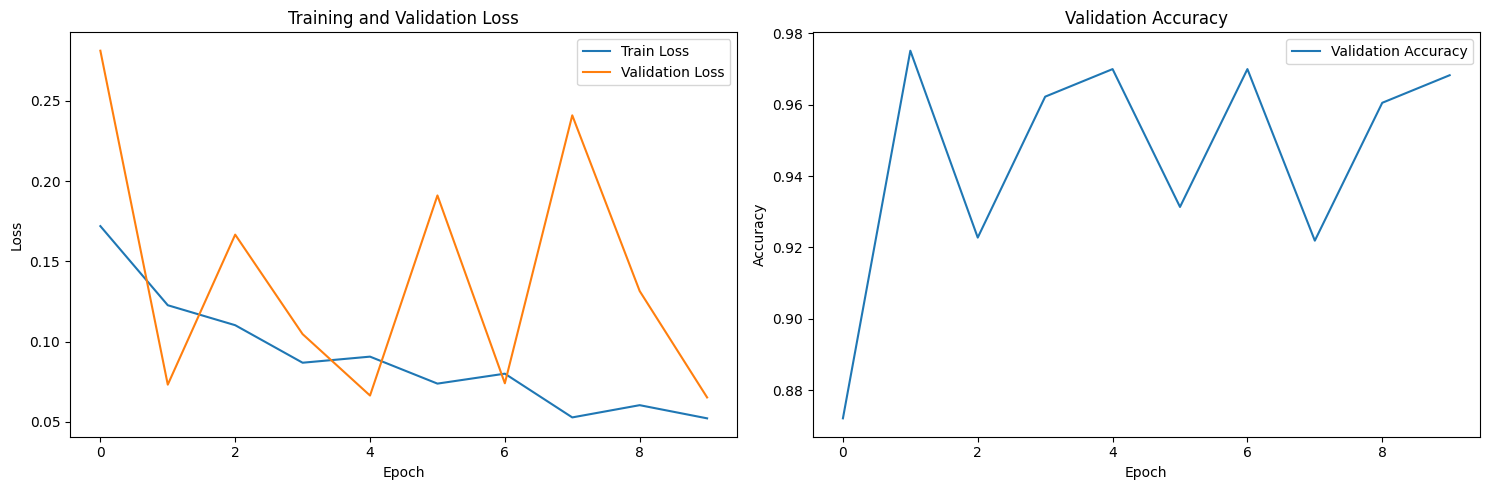

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from datasets import load_dataset
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tqdm.notebook import tqdm
import time
import matplotlib.pyplot as plt



# 3. Training Loop Class
class TrainingLoop:
    def __init__(self, model, train_loader, val_loader, criterion, optimizer, device, num_epochs=10):
        self.model = model
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.criterion = criterion
        self.optimizer = optimizer
        self.device = device
        self.num_epochs = num_epochs

        self.train_losses = []
        self.val_losses = []
        self.accuracies = []
        self.best_val_loss = float('inf')

    def train_epoch(self):
        self.model.train()
        total_loss = 0
        progress_bar = tqdm(self.train_loader, desc='Training')

        for images, labels in progress_bar:
            images = images.to(self.device)
            labels = labels.float().unsqueeze(1).to(self.device)

            self.optimizer.zero_grad()
            outputs = self.model(images)
            loss = self.criterion(outputs, labels)

            loss.backward()
            self.optimizer.step()

            total_loss += loss.item()
            progress_bar.set_postfix({'loss': f'{loss.item():.4f}'})

        return total_loss / len(self.train_loader)

    def validate(self):
        self.model.eval()
        total_loss = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for images, labels in tqdm(self.val_loader, desc='Validating'):
                images = images.to(self.device)
                labels = labels.float().unsqueeze(1).to(self.device)

                outputs = self.model(images)
                loss = self.criterion(outputs, labels)

                preds = (outputs > 0.5).float()

                total_loss += loss.item()
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        accuracy = accuracy_score(all_labels, all_preds)
        precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')

        return {
            'loss': total_loss / len(self.val_loader),
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }

    def train(self):
        print("Starting training...")

        for epoch in range(self.num_epochs):
            start_time = time.time()

            train_loss = self.train_epoch()
            self.train_losses.append(train_loss)

            val_metrics = self.validate()
            self.val_losses.append(val_metrics['loss'])
            self.accuracies.append(val_metrics['accuracy'])

            if val_metrics['loss'] < self.best_val_loss:
                self.best_val_loss = val_metrics['loss']
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': self.optimizer.state_dict(),
                    'loss': val_metrics['loss'],
                }, 'best_model.pth')

            epoch_time = time.time() - start_time
            print(f"\nEpoch [{epoch+1}/{self.num_epochs}] - {epoch_time:.2f} seconds")
            print(f"Train Loss: {train_loss:.4f}")
            print(f"Validation Metrics:")
            print(f"- Loss: {val_metrics['loss']:.4f}")
            print(f"- Accuracy: {val_metrics['accuracy']:.4f}")
            print(f"- Precision: {val_metrics['precision']:.4f}")
            print(f"- Recall: {val_metrics['recall']:.4f}")
            print(f"- F1 Score: {val_metrics['f1']:.4f}")

        print("\nTraining completed!")
        return {
            'train_losses': self.train_losses,
            'val_losses': self.val_losses,
            'accuracies': self.accuracies
        }

# 4. Setup and Training
print("Setting up training...")

# Create datasets and dataloaders
batch_size = 32
train_dataset = ChestXrayDataset(dataset['train'])
val_dataset = ChestXrayDataset(dataset['validation'])
test_dataset = ChestXrayDataset(dataset['test'])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Initialize model, criterion, optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ChestXrayModel().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Create trainer and start training
trainer = TrainingLoop(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=10
)

# Train the model
training_history = trainer.train()

# 5. Plot Results
def plot_training_results(history):
    plt.figure(figsize=(15, 5))

    # Plot losses
    plt.subplot(1, 2, 1)
    plt.plot(history['train_losses'], label='Train Loss')
    plt.plot(history['val_losses'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracies'], label='Validation Accuracy')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the results
plot_training_results(training_history)

***Model Agnostic meta learning***

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.data import Dataset, Sampler
from collections import defaultdict
import random
import copy

# First define the MAML class
class MAML(nn.Module):
    def __init__(self, model, inner_lr=0.01, num_updates=5):
        super(MAML, self).__init__()
        self.model = model
        self.inner_lr = inner_lr
        self.num_updates = num_updates

        # Ensure parameters require gradients
        for param in self.model.parameters():
            param.requires_grad_(True)

    def forward(self, support_images, support_labels, query_images):
        """
        Meta-forward pass with explicit gradient computation
        """
        # Create a new model for adaptation
        adapted_model = copy.deepcopy(self.model)
        adapted_model = adapted_model.float().train()

        # Inner loop optimization on support set
        for _ in range(self.num_updates):
            # Forward pass with gradients
            support_predictions = adapted_model(support_images.float())

            # Ensure predictions and labels are properly formatted
            support_loss = F.binary_cross_entropy(
                support_predictions,
                support_labels.float().unsqueeze(1),
                reduction='mean'
            )

            # Compute gradients
            grads = torch.autograd.grad(
                support_loss,
                adapted_model.parameters(),
                create_graph=True,
                retain_graph=True,
                allow_unused=True
            )

            # Update model parameters
            for param, grad in zip(adapted_model.parameters(), grads):
                if grad is not None:
                    param.data = param.data - self.inner_lr * grad
                    param.requires_grad_(True)

        # Return predictions on query set
        return adapted_model(query_images.float())

# TaskSampler class
class TaskSampler:
    def __init__(self, dataset, n_way=2, k_shot=5, k_query=15):
        self.dataset = dataset
        self.n_way = n_way
        self.k_shot = k_shot
        self.k_query = k_query

        # Group samples by label
        self.label_to_indices = defaultdict(list)
        print("Organizing dataset by labels...")

        # Iterate through dataset and organize by labels
        for idx in range(len(dataset)):
            _, label = dataset[idx]
            label = label.item()
            self.label_to_indices[label].append(idx)

        print(f"Found {len(self.label_to_indices)} unique classes")

    def sample_task(self):
        """
        Sample a single task
        """
        selected_classes = random.sample(list(self.label_to_indices.keys()), self.n_way)

        support_indices = []
        query_indices = []

        for cls in selected_classes:
            available_indices = self.label_to_indices[cls]
            if len(available_indices) < (self.k_shot + self.k_query):
                cls_indices = random.choices(available_indices,
                                          k=(self.k_shot + self.k_query))
            else:
                cls_indices = random.sample(available_indices,
                                         self.k_shot + self.k_query)

            support_indices.extend(cls_indices[:self.k_shot])
            query_indices.extend(cls_indices[self.k_shot:])

        return {
            'support_indices': support_indices,
            'query_indices': query_indices,
            'classes': selected_classes
        }

# Initialize components
torch.cuda.empty_cache()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create a new ChestXrayModel instance specifically for MAML
base_model = ChestXrayModel()
for param in base_model.parameters():
    param.requires_grad_(True)
base_model = base_model.float().to(device)

# Initialize MAML components
try:
    task_sampler = TaskSampler(
        dataset=train_dataset,
        n_way=2,
        k_shot=5,
        k_query=15
    )

    maml_model = MAML(
        model=base_model,
        inner_lr=0.01,
        num_updates=3
    ).float().to(device)

    # Test task sampling
    print("\nTesting task sampling...")
    task = task_sampler.sample_task()
    print(f"Support set size: {len(task['support_indices'])}")
    print(f"Query set size: {len(task['query_indices'])}")
    print(f"Selected classes: {task['classes']}")

except Exception as e:
    print(f"Error: {str(e)}")

Organizing dataset by labels...
Found 2 unique classes

Testing task sampling...
Support set size: 10
Query set size: 30
Selected classes: [0, 1]


In [17]:

maml_model = maml_model.float()

***Training MAML***

Starting MAML training...


Epoch 1/5:   0%|          | 0/20 [00:00<?, ?it/s]


Epoch 1 completed in 24.81 seconds
Train - Loss: 0.7213, Accuracy: 0.5000


Epoch 2/5:   0%|          | 0/20 [00:00<?, ?it/s]


Epoch 2 completed in 24.76 seconds
Train - Loss: 0.7225, Accuracy: 0.5000


Epoch 3/5:   0%|          | 0/20 [00:00<?, ?it/s]


Epoch 3 completed in 25.45 seconds
Train - Loss: 0.7225, Accuracy: 0.5000


Epoch 4/5:   0%|          | 0/20 [00:00<?, ?it/s]


Epoch 4 completed in 24.61 seconds
Train - Loss: 0.7246, Accuracy: 0.5000


Epoch 5/5:   0%|          | 0/20 [00:00<?, ?it/s]


Epoch 5 completed in 24.29 seconds
Train - Loss: 0.7231, Accuracy: 0.5000


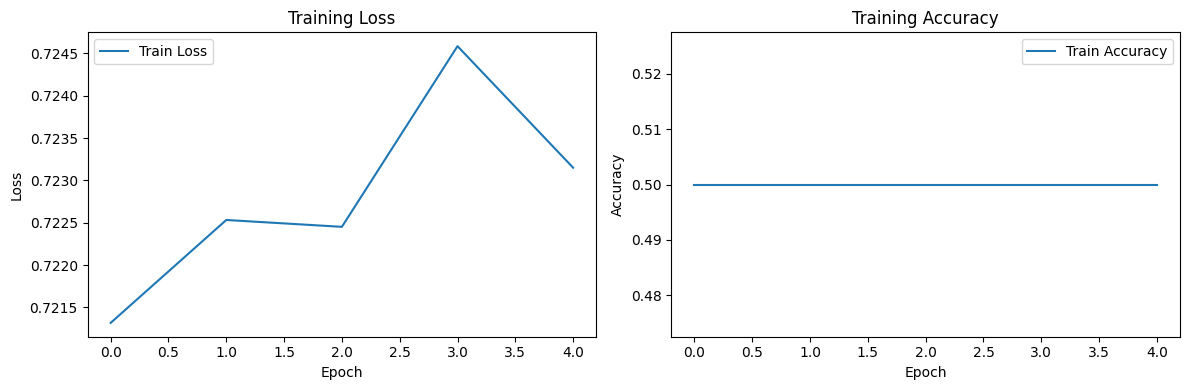

In [18]:
import torch
import torch.nn.functional as F
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import time
import copy

class MAMLTrainer:
    def __init__(self, maml_model, task_sampler, device, meta_lr=0.001, meta_batch_size=1, num_epochs=5):
        self.maml_model = maml_model.float()  # Ensure model is float
        self.task_sampler = task_sampler
        self.device = device
        self.meta_batch_size = meta_batch_size
        self.num_epochs = num_epochs
        self.meta_optimizer = torch.optim.Adam(self.maml_model.parameters(), lr=meta_lr)

        # Initialize metrics
        self.train_losses = []
        self.train_accuracies = []
        self.val_losses = []
        self.val_accuracies = []
        self.best_accuracy = 0

    def train_step(self, task_batch):
        total_meta_loss = 0
        total_accuracy = 0

        self.meta_optimizer.zero_grad()

        for task in task_batch:
            # Get support and query sets with explicit float conversion
            support_images = torch.stack([
                self.task_sampler.dataset[idx][0].float()
                for idx in task['support_indices']
            ]).to(self.device)

            support_labels = torch.tensor([
                self.task_sampler.dataset[idx][1]
                for idx in task['support_indices']
            ], dtype=torch.float32).to(self.device)

            query_images = torch.stack([
                self.task_sampler.dataset[idx][0].float()
                for idx in task['query_indices']
            ]).to(self.device)

            query_labels = torch.tensor([
                self.task_sampler.dataset[idx][1]
                for idx in task['query_indices']
            ], dtype=torch.float32).to(self.device)

            # Forward pass
            query_predictions = self.maml_model(support_images, support_labels, query_images)

            meta_loss = F.binary_cross_entropy_with_logits(
                query_predictions,
                query_labels.unsqueeze(1)
            )

            predictions = (torch.sigmoid(query_predictions) > 0.5).float()
            accuracy = (predictions == query_labels.unsqueeze(1)).float().mean()

            total_meta_loss += meta_loss
            total_accuracy += accuracy.item()

        # Average meta-loss and backward pass
        meta_loss = total_meta_loss / len(task_batch)
        meta_loss.backward()
        self.meta_optimizer.step()

        return {
            'loss': meta_loss.item(),
            'accuracy': total_accuracy / len(task_batch)
        }

    def train(self):
        print("Starting MAML training...")
        best_model = None

        for epoch in range(self.num_epochs):
            start_time = time.time()
            self.maml_model.train()

            # Training phase
            train_loss = 0
            train_accuracy = 0
            num_batches = 20

            for _ in tqdm(range(num_batches), desc=f'Epoch {epoch+1}/{self.num_epochs}'):
                task_batch = [self.task_sampler.sample_task() for _ in range(self.meta_batch_size)]
                metrics = self.train_step(task_batch)
                train_loss += metrics['loss']
                train_accuracy += metrics['accuracy']

            train_loss /= num_batches
            train_accuracy /= num_batches

            # Save metrics
            self.train_losses.append(train_loss)
            self.train_accuracies.append(train_accuracy)

            # Print epoch summary
            epoch_time = time.time() - start_time
            print(f"\nEpoch {epoch+1} completed in {epoch_time:.2f} seconds")
            print(f"Train - Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}")

        return {
            'train_losses': self.train_losses,
            'train_accuracies': self.train_accuracies
        }

    def plot_metrics(self):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(self.train_losses, label='Train Loss')
        plt.title('Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(self.train_accuracies, label='Train Accuracy')
        plt.title('Training Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.tight_layout()
        plt.show()

# Initialize and start training
torch.cuda.empty_cache()
maml_trainer = MAMLTrainer(
    maml_model=maml_model,
    task_sampler=task_sampler,
    device=device,
    meta_lr=0.001,
    meta_batch_size=1,
    num_epochs=5
)

try:
    history = maml_trainer.train()
    maml_trainer.plot_metrics()
except RuntimeError as e:
    print(f"Training failed with error: {str(e)}")

Starting evaluation...
Evaluating MAML on tasks...


100%|██████████| 50/50 [01:03<00:00,  1.28s/it]


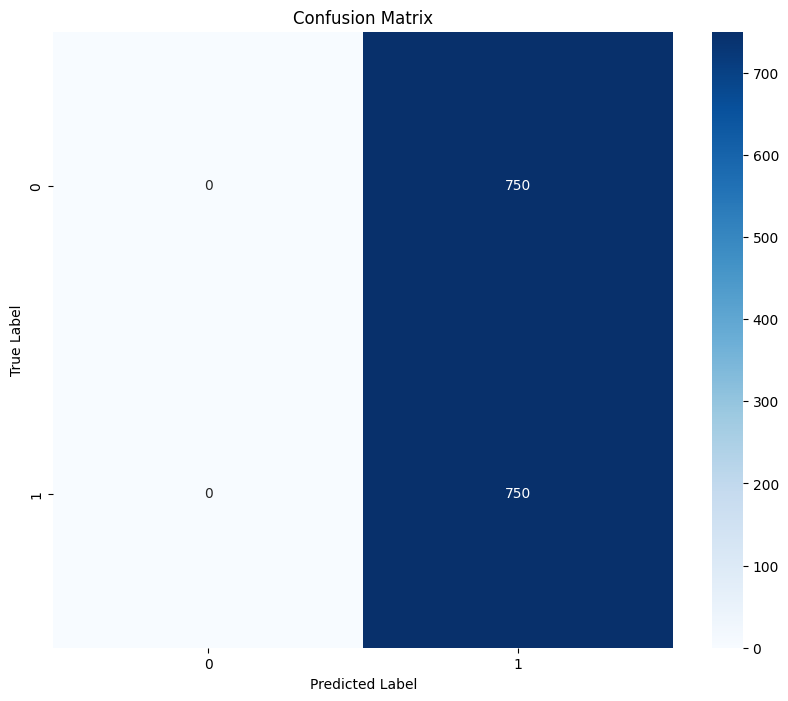


Overall Metrics:
Accuracy: 0.5000 ± 0.0000
Precision: 0.5000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1 Score: 0.6667 ± 0.0000


In [20]:
import torch
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class MAMLEvaluator:
    def __init__(self, maml_model, task_sampler, device):
        self.maml_model = maml_model.float()  # Ensure model is float
        self.task_sampler = task_sampler
        self.device = device
        self.maml_model.eval()

        # Ensure all parameters require gradients
        for param in self.maml_model.parameters():
            param.requires_grad_(True)

    def evaluate_on_tasks(self, num_tasks=50):
        accuracies = []
        precisions = []
        recalls = []
        f1_scores = []
        all_preds = []
        all_labels = []

        print("Evaluating MAML on tasks...")
        for _ in tqdm(range(num_tasks)):
            # Sample a task
            task = self.task_sampler.sample_task()

            # Get support and query sets with explicit float conversion
            support_images = torch.stack([
                self.task_sampler.dataset[idx][0].float()
                for idx in task['support_indices']
            ]).to(self.device)

            support_labels = torch.tensor([
                self.task_sampler.dataset[idx][1]
                for idx in task['support_indices']
            ], dtype=torch.float32).to(self.device)

            query_images = torch.stack([
                self.task_sampler.dataset[idx][0].float()
                for idx in task['query_indices']
            ]).to(self.device)

            query_labels = torch.tensor([
                self.task_sampler.dataset[idx][1]
                for idx in task['query_indices']
            ], dtype=torch.float32).to(self.device)

            # Forward pass with gradient computation
            with torch.enable_grad():  # Enable gradients even in eval mode
                predictions = self.maml_model(support_images, support_labels, query_images)
                predictions = torch.sigmoid(predictions)
                binary_preds = (predictions > 0.5).float()

            # Calculate metrics
            pred_np = binary_preds.detach().cpu().numpy()
            labels_np = query_labels.unsqueeze(1).cpu().numpy()

            accuracies.append(accuracy_score(labels_np, pred_np))
            precision, recall, f1, _ = precision_recall_fscore_support(
                labels_np, pred_np, average='binary', zero_division=0
            )

            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1)

            all_preds.extend(pred_np.flatten())
            all_labels.extend(labels_np.flatten())

            # Clear memory
            torch.cuda.empty_cache()

        # Calculate overall metrics
        overall_metrics = {
            'accuracy_mean': np.mean(accuracies),
            'accuracy_std': np.std(accuracies),
            'precision_mean': np.mean(precisions),
            'precision_std': np.std(precisions),
            'recall_mean': np.mean(recalls),
            'recall_std': np.std(recalls),
            'f1_mean': np.mean(f1_scores),
            'f1_std': np.std(f1_scores)
        }

        return overall_metrics, (all_preds, all_labels)

    def plot_results(self, metrics, predictions_labels):
        """
        Plot evaluation results
        """
        predictions, labels = predictions_labels

        # Create confusion matrix
        cm = confusion_matrix(labels, predictions)

        # Plot confusion matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

        # Print metrics
        print("\nOverall Metrics:")
        print(f"Accuracy: {metrics['accuracy_mean']:.4f} ± {metrics['accuracy_std']:.4f}")
        print(f"Precision: {metrics['precision_mean']:.4f} ± {metrics['precision_std']:.4f}")
        print(f"Recall: {metrics['recall_mean']:.4f} ± {metrics['recall_std']:.4f}")
        print(f"F1 Score: {metrics['f1_mean']:.4f} ± {metrics['f1_std']:.4f}")

# Run evaluation
try:
    # Clear GPU memory
    torch.cuda.empty_cache()

    # Initialize evaluator
    evaluator = MAMLEvaluator(
        maml_model=maml_model,
        task_sampler=task_sampler,
        device=device
    )

    # Evaluate model
    print("Starting evaluation...")
    metrics, predictions_labels = evaluator.evaluate_on_tasks(num_tasks=50)

    # Plot and display results
    evaluator.plot_results(metrics, predictions_labels)

except Exception as e:
    print(f"Evaluation failed with error: {str(e)}")